In [96]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
comp='shannon'
import sys  # update paths
sys.path.append('../../')

sys.path.append('../')

import numpy as np 
import matplotlib.pyplot as plt

import scresonators.fit_resonator.ana_tls as ana_tls
import scresonators.measurement.handy as hy
import seaborn as sns

colors = ["#454c7c", '#b51d14', '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(colors)
#G:\Shared drives\SLab\JJ_fab\Coherence Sample\022125_Resonator\data

if comp=='shannon':
    pth_base ='/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/'
elif comp=='bf1':
    pth_base='G:/'

folder = 'My Drive/Projects/Materials/'
#folder = 'Shared drives/SLab/JJ_fab/Coherence Sample/'
pth = os.path.join(pth_base,folder)
img_pth = os.path.join(pth,'Outputs/Resonators/')
meas = 'siliconta7_res_sq'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
cfg, data_pth, folder, img_name, ind = hy.get_params('mini.yml', meas, pth=pth)
#data_pth = os.path.join(data_pth, folder)

-98.0093348323698
-99.61853106984672
-101.41768583710746
-102.8398255203995
-103.04237520280994
-104.19383665900118
-106.0214213250339
-107.89842400714925


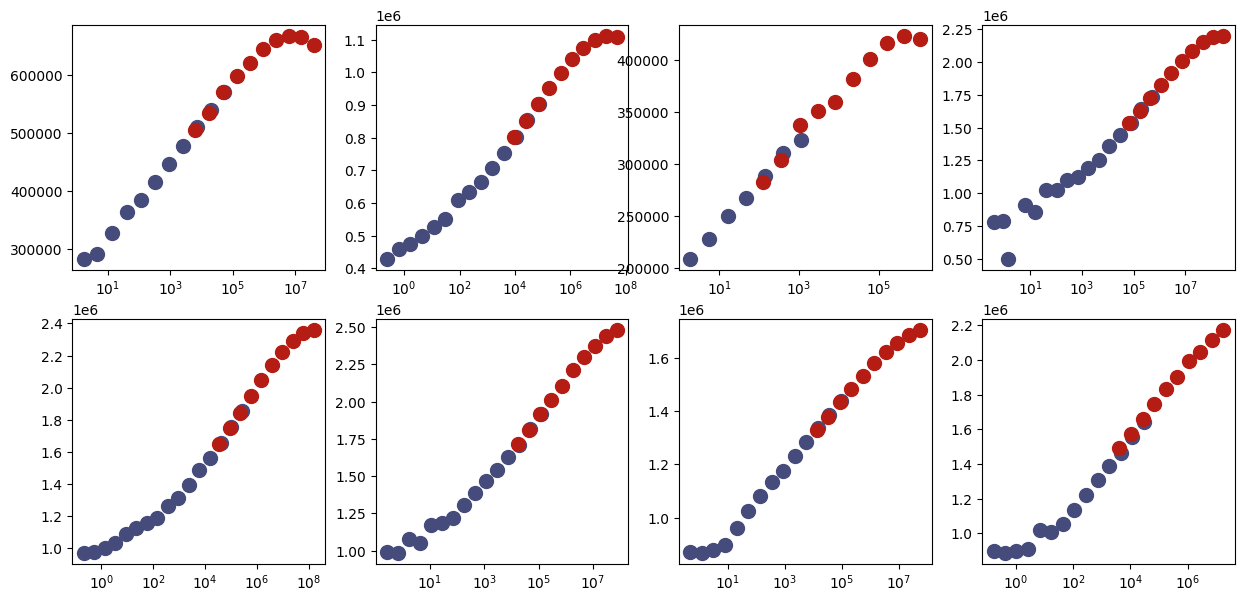

In [98]:
import pandas as pd
fig, ax = plt.subplots(2,4, figsize=(15, 7))
ax = ax.flatten()
df_full = pd.DataFrame()
#ord = [4, 5, 6, 0, 7, 1, 2, 3, 4]
ord = [3, 4, 5, 6, 0, 1, 7, 2]

    #print(csv_files_in_dir)

csv_files_in_dir = [f for f in os.listdir(os.path.join(data_pth, cfg['dir'][0])) if f.endswith('.csv') and f.startswith('fit_results')]
csv_files_in_dir.sort()

for i, csv_file in enumerate(csv_files_in_dir):
    for j in range(len(cfg['dir'])):
    
        file_path = os.path.join(data_pth, cfg['dir'][j], csv_file)
        df = pd.read_csv(file_path)

        df['pitch']=cfg['pitch'][i]
        df['target_freq']=cfg['target_freq'][i]
        df['resonator_id'] = i
        df['temp']=0.04

        if j==0: 
            max_pow = df['power_at_device_dBm'].max()
            df_copy = df.copy(deep=True)
            print(max_pow)
            #print(df_copy)
            #print(df_copy)
        else: 
            #print(df_copy)
            df_filtered = df[df['power_at_device_dBm'] > max_pow]
            df_combined = pd.concat([df_copy, df_filtered], ignore_index=True)            
            df_full = pd.concat([df_full, df_combined], ignore_index=True)
            #print(df_combined)

        #df_full = pd.concat([df_full, df], ignore_index=True)
        
        ax[ord[i]].semilogx(df['photon_number'], df['q_internal'],'o')


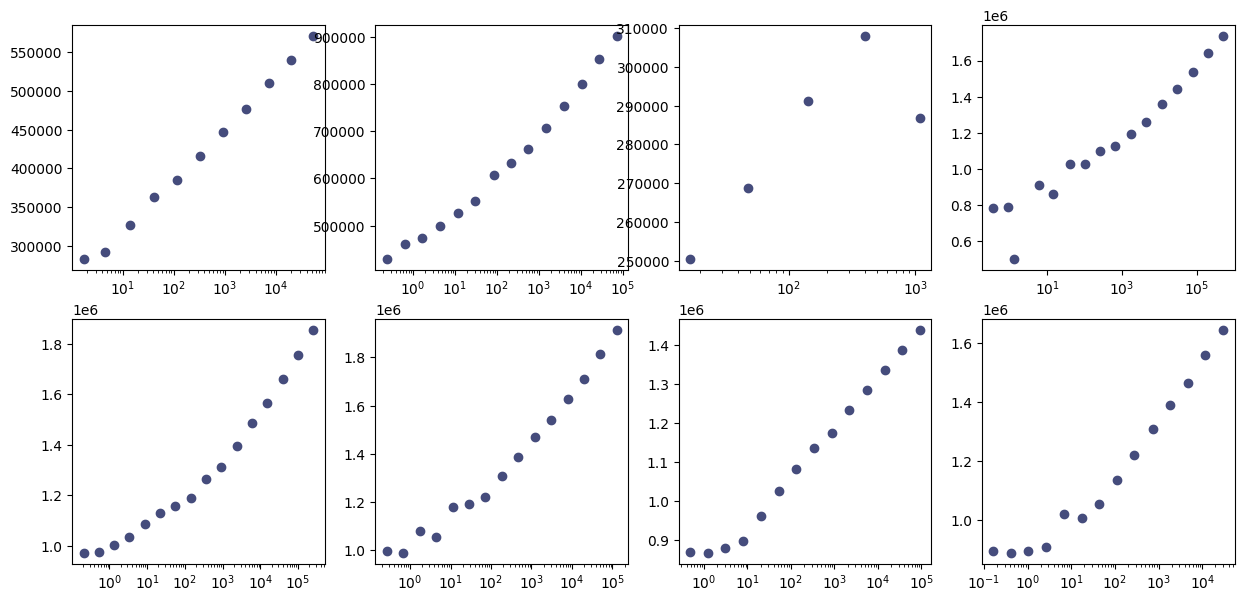

In [ ]:
import pandas as pd
fig, ax = plt.subplots(2,4, figsize=(15, 7))
ax = ax.flatten()
df_full = pd.DataFrame()
#ord = [4, 5, 6, 0, 7, 1, 2, 3, 4]
ord = [3, 4, 5, 6, 0, 1,7, 2]

csv_files_in_dir = [f for f in os.listdir(data_pth) if f.endswith('.csv')]
csv_files_in_dir.sort()
    #print(csv_files_in_dir)
for i, csv_file in enumerate(csv_files_in_dir):
    file_path = os.path.join(data_pth, csv_file)
    df = pd.read_csv(file_path)

    df['pitch']=cfg['pitch'][i]
    df['target_freq']=cfg['target_freq'][i]
    df['resonator_id'] = i
    df['temp']=0.04
    df_full = pd.concat([df_full, df], ignore_index=True)
    ax[ord[i]].semilogx(df['photon_number'], df['q_internal'],'o')


In [99]:
df_full = df_full.sort_values(by='pitch')

In [84]:
df_30 = df_full[df_full['pitch'] == 30].sort_values(by='power_at_device_dBm')

/Users/sph/Documents/Git/scresonators/../scresonators/fit_resonator/ana_tls.py:482: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend()


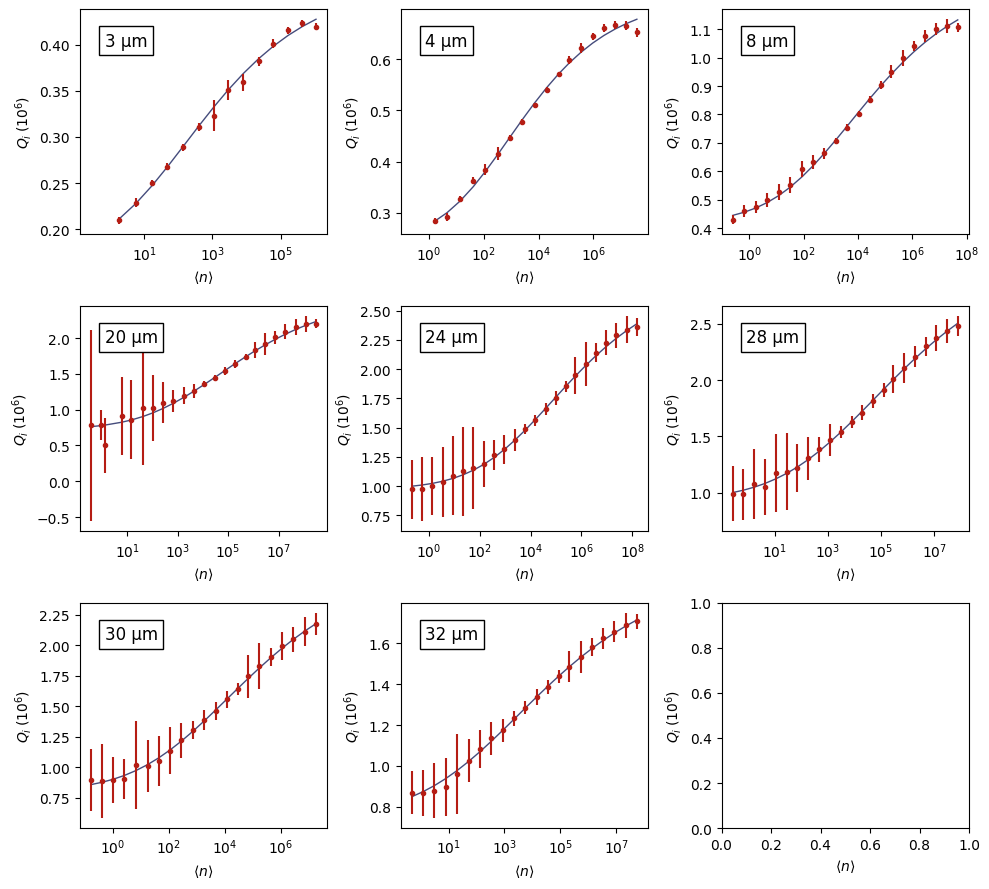

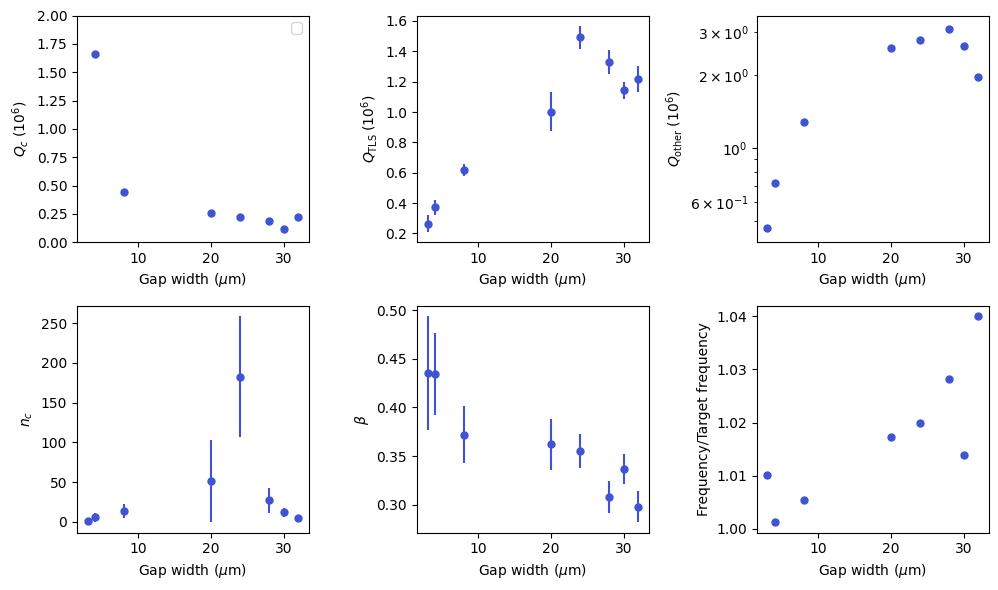

In [100]:
#max_photon = [4e7, 4e7, 1e10, 3e8, 0.8e8, 1e8, 5e8]
#min_photon = [0.1, 1,1, 1,1,1,1]
params = ana_tls.fit_qi2(df_full, img_pth, name=img_name)#, max_photon_vec=max_photon, min_photon_vec=min_photon) 
ana_tls.plot_res_pars([params], [''],img_pth, name=img_name)

In [95]:
params

{'qtls0': array([1002582.44128877, 1492518.85186365, 1329272.75842573,
        1218818.9605152 ,  371351.25138689,  617648.90745362,
        1144759.20471853,  264715.8487723 ]),
 'qother': array([2567977.26793277, 2781494.00806767, 3096015.0514271 ,
        1954292.31830315,  721049.04498463, 1275184.33003523,
        2634188.814374  ,  467484.67473592]),
 'nc': array([ 51.16400065, 182.76182671,  27.18233763,   4.4270775 ,
          5.57966194,  13.92671117,  12.15130245,   1.46060984]),
 'beta': array([0.36212715, 0.35520312, 0.3078623 , 0.29808868, 0.43459162,
        0.37209068, 0.33685123, 0.43555541]),
 'qtls0_err': array([127189.13439897,  75749.78858254,  81530.43654018,  85133.77909347,
         50396.37876518,  41495.4094601 ,  56386.00716379,  54461.74067467]),
 'qother_err': array([71526.74443179, 55580.71938226, 84848.19334756, 31260.11092485,
        17375.89727621, 36710.00067759, 55239.1797255 , 15506.42791656]),
 'nc_err': array([51.57995698, 75.91089059, 15.57862809,

In [102]:
hy.save_np(params, img_pth+'Text/' +cfg['pth'][ind][0:-1] +cfg['meas'][ind] + '.yml')